In [3]:
#Installing PyTorch 
!pip install torch torchvision matplotlib

In [4]:
#Importing the necessary lIbraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [5]:
import os
from torchvision import datasets, transforms

#The tranformations
transform = transforms.Compose([
    transforms.Resize((150, 150)),  #Resizing
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalization
])

train_dir = 'data/seg_train/seg_train'
test_dir = 'data/seg_test/seg_test'

trainset = datasets.ImageFolder(root=train_dir, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.ImageFolder(root=test_dir, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


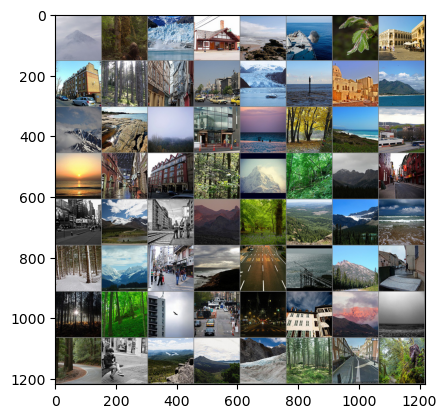

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.__next__() 

# Show images
imshow(torchvision.utils.make_grid(images))


In [16]:
#CNN Layers which comprises of fully connected layers, and softmax activation at the output fro further classiffication

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 37 * 37, 512)  # Adjust for 150x150 input size
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 6)  # 6 output classes for Intel dataset

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 37 * 37)  # Flatten the output
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net=Net()

In [18]:
#For classification purposes two things are used criterion and optimizer both
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [22]:
#Training the model beings now
#With each batch/chunk of data : 
# Gradient buffers=0 --> Forward to network --> backward pass --> weight update
for epoch in range(10):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training")

[1, 100] loss: 1.636
[1, 200] loss: 1.238
[2, 100] loss: 1.052
[2, 200] loss: 0.991
[3, 100] loss: 0.930
[3, 200] loss: 0.905
[4, 100] loss: 0.850
[4, 200] loss: 0.839
[5, 100] loss: 0.821
[5, 200] loss: 0.757
[6, 100] loss: 0.730
[6, 200] loss: 0.698
[7, 100] loss: 0.653
[7, 200] loss: 0.665
[8, 100] loss: 0.609
[8, 200] loss: 0.622
[9, 100] loss: 0.574
[9, 200] loss: 0.553
[10, 100] loss: 0.528
[10, 200] loss: 0.506
Finished Training


In [24]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct / total}%")

Accuracy of the network on the 10000 test images: 78.0%


In [28]:
classes = ('buildings','forest','glacier','mountain','sea','street')

In [33]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(6):
    print(f"Accuracy of {classes[i]}: {100 * class_correct[i] / class_total[i]}%")


Accuracy of buildings: 85.71428571428571%
Accuracy of forest: 90.625%
Accuracy of glacier: 78.125%
Accuracy of mountain: 80.55555555555556%
Accuracy of sea: 83.87096774193549%
Accuracy of street: 58.62068965517241%
